<a href="https://colab.research.google.com/github/satishsinghtoo/Deep-Leraning/blob/main/tomatodisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install tensorflow

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
!nvidia-smi

Tue Jan 30 04:01:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [29]:
import keras

In [32]:
keras.utils.custom_object_scope

keras.src.saving.object_registration.CustomObjectScope

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train'
valid_path = '/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/valid'

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [6]:
for layer in inception.layers:
  layer.trainable = False

In [9]:
folders = glob('/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train/*')

In [10]:
folders

['/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train/Tomato___healthy',
 '/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train/Tomato___Late_blight',
 '/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train/Tomato___Early_blight']

In [11]:
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [35]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [37]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/train',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 204 images belonging to 10 classes.


In [38]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Programs/Tomato Dataset/Tomato Dataset/valid',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [39]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set),
)

<ipython-input-39-707847b7b93e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
13/13 [==============================] - 1134s 94s/step - loss: 0.1958 - accuracy: 0.9265 - val_loss: 186.0397 - val_accuracy: 0.1069
Epoch 2/10
13/13 [==============================] - 45s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 224.4299 - val_accuracy: 0.1069
Epoch 3/10
13/13 [==============================] - 27s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 235.7499 - val_accuracy: 0.1069
Epoch 4/10
13/13 [==============================] - 29s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 239.0851 - val_accuracy: 0.1069
Epoch 5/10
13/13 [==============================] - 27s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 240.0450 - val_accuracy: 0.1069
Epoch 6/10
13/13 [==============================] - 27s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 240.3156 - val_accuracy: 0.1069
Epoch 7/10
13/13 [==============================] - 26s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 240.3908 - 

In [40]:
import matplotlib.pyplot as plt

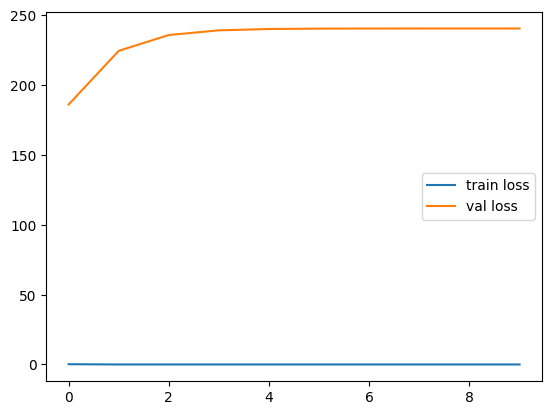

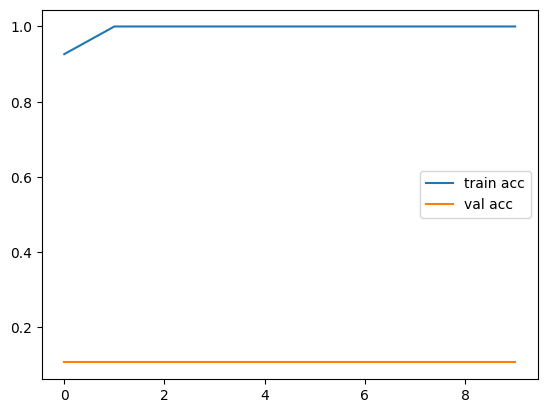

<Figure size 640x480 with 0 Axes>

In [41]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')